In [1]:
import pandas as pd

results = pd.read_csv("_res/expertdt_results_95_threshold.csv")

In [2]:
results[results['id']=='HP12.6073']

,id,subtype,slide,format,node_pruned,node_count_1,node_count_2,ccRCC,pRCC,CHROMO,ONCOCYTOMA,result
9,HP12.6073,ccRCC,HP12.6073.A5.ccRCC,scn,99.64,5,2765,477,2257,0,0,pRCC
10,HP12.6073,ccRCC,HP12.6073.A5-1.ccRCC,scn,99.65,6,3404,1328,2045,0,0,pRCC
11,HP12.6073,ccRCC,HP12.6073_A5_ccRCC,scn,99.75,4,3204,1313,1852,0,0,pRCC
12,HP12.6073,ccRCC,HP12.6073.1A6.ccRCC,scn,100.00,0,4016,2522,1428,0,0,ccRCC


In [3]:
import pandas as pd


most_common_subtype = results.groupby('id')['subtype'].agg(lambda x: x.mode()[0] if not x.mode().empty else None).reset_index()

# Group by 'id' and sum the counts for ccRCC, pRCC, CHROMO, and ONCOCYTOMA
grouped_sum = results.groupby('id')[['ccRCC', 'pRCC', 'CHROMO', 'ONCOCYTOMA']].sum().reset_index()

# Merge the sum counts with the most common subtype
grouped_sum = pd.merge(grouped_sum, most_common_subtype, on='id', how='left')

# Determine the majority vote result for each id
def determine_majority(row):
    counts = row[['ccRCC', 'pRCC', 'CHROMO', 'ONCOCYTOMA']].to_dict()
    # Sort counts by value and return the highest as the result
    majority_vote = max(counts, key=counts.get)
    return majority_vote

grouped_sum['result'] = grouped_sum.apply(determine_majority, axis=1)

print(grouped_sum[['id', 'subtype', 'result']])

            id     subtype      result
0      H19.754       ccRCC       ccRCC
1    HP10.2986       ccRCC       ccRCC
2   HP12.13358       ccRCC       ccRCC
3    HP12.3187       ccRCC       ccRCC
4    HP12.6073       ccRCC        pRCC
5    HP12.7225       ccRCC       ccRCC
6    HP12.7726        pRCC        pRCC
7    HP12.8355       ccRCC       ccRCC
8    HP12.8793       ccRCC       ccRCC
9    HP12.9282       ccRCC       ccRCC
10   HP13.1799       ccRCC       ccRCC
11   HP13.3201        pRCC        pRCC
12  HP14.10122        pRCC        pRCC
13   HP14.1749       ccRCC       ccRCC
14   HP14.1993       ccRCC       ccRCC
15   HP14.2377        pRCC        pRCC
16  HP15.11259       ccRCC       ccRCC
17   HP15.1480       ccRCC       ccRCC
18   HP15.2902       ccRCC       ccRCC
19   HP15.9102        pRCC        pRCC
20   HP16.6209       ccRCC       ccRCC
21   HP16.6211       ccRCC       ccRCC
22  HP17008718      CHROMO      CHROMO
23   HP18.5818        pRCC        pRCC
24  HP18014084      CHROM

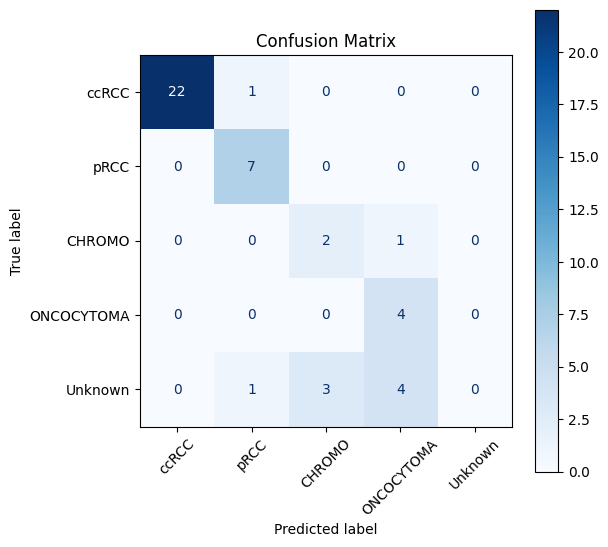

In [4]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_true = grouped_sum['subtype']
y_pred = grouped_sum['result']

cm = confusion_matrix(y_true, y_pred, labels=pd.unique(y_true))

fig, ax = plt.subplots(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pd.unique(y_true))
disp.plot(cmap=plt.cm.Blues, ax=ax, values_format='g')
plt.xticks(rotation=45)
plt.title('Confusion Matrix')
plt.show()

In [22]:
(23/23 + 1 + 2/3 + 1)/4

0.9166666666666666

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate precision
# Note: Adjust the 'average' parameter based on your needs. 
# 'None' will return the precision for each class, 'micro', 'macro', and 'weighted' provide different ways to handle imbalanced classes.
precision = precision_score(y_true, y_pred, average='macro')
print(f"Precision: {precision}")

# Calculate recall
recall = recall_score(y_true, y_pred, average='macro')
print(f"Recall: {recall}")

Accuracy: 0.9459459459459459
Precision: 0.91875
Recall: 0.9057971014492754


In [10]:
import pandas as pd

# Assuming `df` is your DataFrame

# Group by 'id' and sum the counts for ccRCC, pRCC, CHROMO, and ONCOCYTOMA
grouped_sum = results.groupby('id')[['ccRCC', 'pRCC', 'CHROMO', 'ONCOCYTOMA']].sum().reset_index()

# Determine the majority vote result for each id
def determine_majority(row):
    counts = row[['ccRCC', 'pRCC', 'CHROMO', 'ONCOCYTOMA']].to_dict()
    # Sort counts by value and return the highest as the result
    majority_vote = max(counts, key=counts.get)
    return majority_vote

grouped_sum['result'] = grouped_sum.apply(determine_majority, axis=1)

print(grouped_sum[['id', 'result']])

            id      result
0      H19.754       ccRCC
1    HP10.2986       ccRCC
2   HP12.13358       ccRCC
3    HP12.3187       ccRCC
4    HP12.6073        pRCC
5    HP12.7225       ccRCC
6    HP12.7726        pRCC
7    HP12.8355       ccRCC
8    HP12.8793       ccRCC
9    HP12.9282       ccRCC
10   HP13.1799       ccRCC
11   HP13.3201        pRCC
12  HP14.10122        pRCC
13   HP14.1749       ccRCC
14   HP14.1993       ccRCC
15   HP14.2377        pRCC
16  HP15.11259       ccRCC
17   HP15.1480       ccRCC
18   HP15.2902       ccRCC
19   HP15.9102        pRCC
20   HP16.6209       ccRCC
21   HP16.6211       ccRCC
22  HP17008718      CHROMO
23   HP18.5818        pRCC
24  HP18014084  ONCOCYTOMA
25  HP19.10064       ccRCC
26   HP19.1773        pRCC
27   HP19.2434       ccRCC
28   HP19.4372       ccRCC
29   HP19.7715       ccRCC
30   HP19.7864       ccRCC
31    HP19.999       ccRCC
32  HP19008963  ONCOCYTOMA
33  HP20001530  ONCOCYTOMA
34  HP20002450  ONCOCYTOMA
35     HP51171  ONCOCYTOMA
3

In [9]:
import pandas as pd

# Assuming `df` is your DataFrame

# Step 1: Group by 'id' and 'result', and count the occurrences
grouped = results.groupby(['id', 'result']).size().reset_index(name='count')

# Step 2: Find ids with similar count of rows for different results
# Pivot the table to have ids as rows and results as columns with their counts
pivot_table = grouped.pivot(index='id', columns='result', values='count').fillna(0)

# Find the ids where there are at least two results with the same non-zero count
ids_with_similar_counts = pivot_table[(pivot_table.T != 0).sum() >= 2].apply(lambda x: x.nunique(), axis=1)
ids_with_similar_counts = ids_with_similar_counts[ids_with_similar_counts >= 2].index.tolist()

# Filter the original DataFrame to get rows corresponding to these ids
filtered_df = results[results['id'].isin(ids_with_similar_counts)]

pd.DataFrame(filtered_df)

,id,subtype,slide,format,node_pruned,ccRCC,pRCC,CHROMO,ONCOCYTOMA,result
9,HP12.6073,ccRCC,HP12.6073.A5.ccRCC,scn,False,477,2257,0,0,pRCC
10,HP12.6073,ccRCC,HP12.6073.A5-1.ccRCC,scn,False,1328,2045,0,0,pRCC
11,HP12.6073,ccRCC,HP12.6073_A5_ccRCC,scn,False,1313,1852,0,0,pRCC
12,HP12.6073,ccRCC,HP12.6073.1A6.ccRCC,scn,False,2522,1428,0,0,ccRCC
60,HP13.3201,pRCC,HP13.3201.D1.pRCC,scn,True,0,0,0,0,ccRCC
61,HP13.3201,pRCC,HP13.3201.A5.pRCC,scn,False,0,1,0,0,pRCC


In [17]:
import pandas as pd

# Assuming `df` is your DataFrame

# Group by 'id' and 'result' to count occurrences
grouped = results.groupby(['id', 'result', 'subtype']).size().reset_index(name='counts')

# Sort the groups to get the most frequent 'result' on top for each 'id'
grouped = grouped.sort_values(['id', 'counts'], ascending=[True, False])

# Drop duplicate 'id', keeping the first occurrence since it has the highest count
# decision_df = grouped.drop_duplicates('id', keep='first').drop('counts', axis=1)

print(grouped)

            id      result     subtype  counts
0      H19.754       ccRCC       ccRCC       1
1    HP10.2986       ccRCC       ccRCC       2
2   HP12.13358       ccRCC       ccRCC       4
3    HP12.3187       ccRCC       ccRCC       1
5    HP12.6073        pRCC       ccRCC       3
4    HP12.6073       ccRCC       ccRCC       1
6    HP12.7225       ccRCC       ccRCC       1
7    HP12.7726        pRCC        pRCC       4
8    HP12.8355       ccRCC       ccRCC       1
9    HP12.8793       ccRCC       ccRCC       1
10   HP12.9282       ccRCC       ccRCC       5
11   HP13.1799       ccRCC       ccRCC       1
12   HP13.3201       ccRCC        pRCC       1
13   HP13.3201        pRCC        pRCC       1
14  HP14.10122        pRCC        pRCC       2
15   HP14.1749       ccRCC       ccRCC       3
16   HP14.1993       ccRCC       ccRCC       1
17   HP14.2377        pRCC        pRCC       1
18  HP15.11259       ccRCC       ccRCC       3
19   HP15.1480       ccRCC       ccRCC       1
20   HP15.290